In [214]:
import pandas as pd
df = pd.read_csv('../../preprocessing/output_results/hotels_preprocessed_all.csv')
df

,name,location,price,date,stars,km_from_center,num_external_reviews,booking_user_ratings,avg_user_ratings,airport_taxi,travel_sustainable_level,has_free_cancelation,town_location,price_category,month
0,"The Pavilions Amsterdam, The Toren","Amsterdam City Center, Amsterdam",233.450157,2024-02-01,4,0.6,1044,5,8.900000,0,4,0,Amsterdam,High,February
1,Sonder Park House,"Oud Zuid, Amsterdam",144.615141,2024-02-01,4,1.7,3190,1,7.500000,0,0,1,Amsterdam,High,February
2,Hotel Jansen Amsterdam Bajeskwartier,"Oost, Amsterdam",85.679184,2024-02-01,0,4.2,1155,2,8.300000,0,3,1,Amsterdam,Medium,February
3,AmicitiA,"Amsterdam City Center, Amsterdam",30.061730,2024-02-01,0,1.2,1820,1,7.100000,0,0,1,Amsterdam,Low,February
4,Hotel Washington,"Oud Zuid, Amsterdam",50.102884,2024-02-01,2,2.1,2205,1,7.300000,0,0,0,Amsterdam,Low,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51287,Schöne 2 1/2 Zimmer Wohnung im Herzen von Dort...,"Dortmund City Centre, Dortmund",190.748835,2025-01-31,0,0.6,11,5,8.600000,0,0,0,Dortmund,High,January
51288,schlafgut24,Dortmund,119.254623,2025-01-31,0,10.9,16,4,9.600000,0,2,0,Dortmund,Medium,January
51289,3 Zimmer Wohnung in Dortmund,Dortmund,190.390958,2025-01-31,0,3.0,3,2,8.000000,0,0,0,Dortmund,High,January
51290,"Wohnung Nähe Uni,Stadion",Dortmund,84.768223,2025-01-31,0,5.0,0,0,7.789035,0,0,0,Dortmund,Medium,January


In [215]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix


In [216]:

label_encoder = LabelEncoder()
df['town_location'] = label_encoder.fit_transform(df['town_location'])
df['price_category'] = label_encoder.fit_transform(df['price_category'])
df['month'] = label_encoder.fit_transform(df['month'])


X = df.drop(['price','name','location','date'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Regression Mean Squared Error: 272.21039924474763


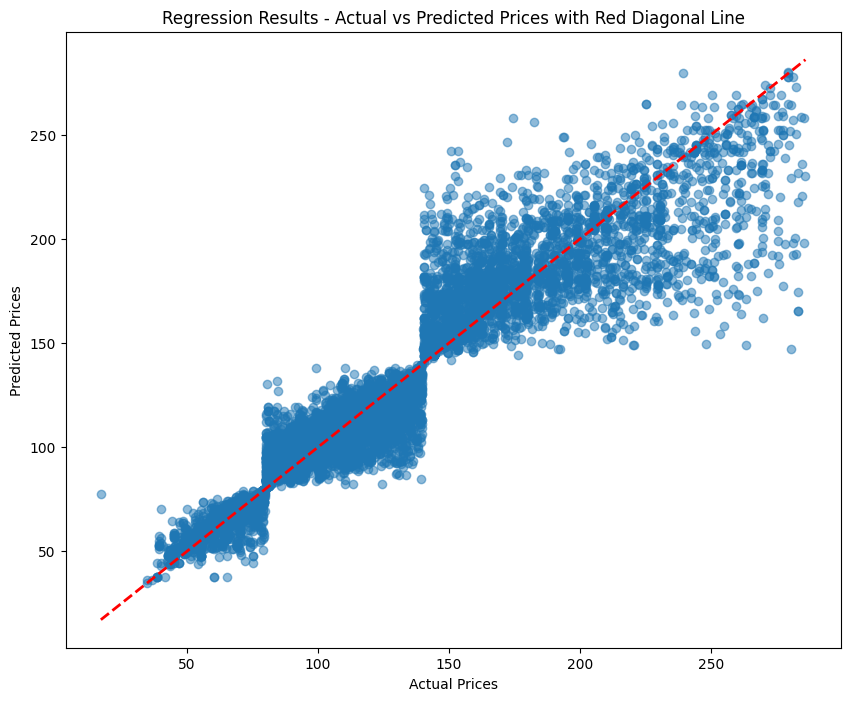

In [217]:
from sklearn.ensemble import  RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_scaled, y_train)

predictions_regression = regressor.predict(X_test_scaled)

mse_regression = mean_squared_error(y_test, predictions_regression)
print(f'Regression Mean Squared Error: {mse_regression}')


plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions_regression, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Regression Results - Actual vs Predicted Prices with Red Diagonal Line')
plt.show()

Regression Mean Squared Error (XGBoost): 271.34257441863105


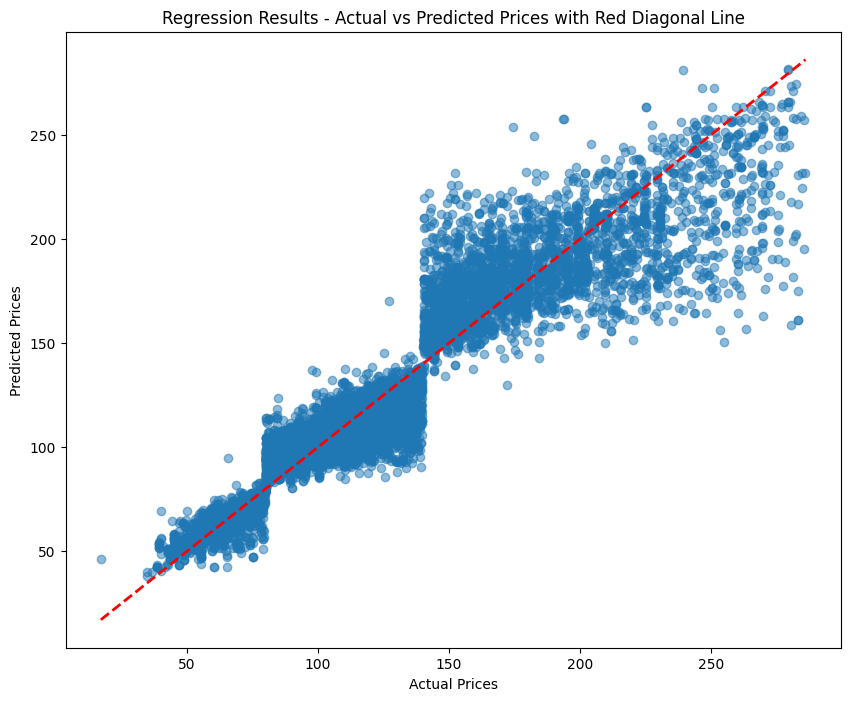

In [218]:
from xgboost import XGBRegressor

# XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=900, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_scaled, y_train)

predictions_regression = xgb_reg.predict(X_test_scaled)

mse_regression = mean_squared_error(y_test, predictions_regression)
print(f'Regression Mean Squared Error (XGBoost): {mse_regression}')


plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions_regression, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Regression Results - Actual vs Predicted Prices with Red Diagonal Line')
plt.show()

if we dont include price in the test set

In [219]:
from sklearn.tree import DecisionTreeClassifier

X_price_category = df.drop(['price', 'name', 'location', 'date', 'price_category'], axis=1)
y_price_category = df['price_category']

X_train_price_category, X_test_price_category, y_train_price_category, y_test_price_category = train_test_split(
    X_price_category, y_price_category, test_size=0.2, random_state=42
)

model_price_category = DecisionTreeClassifier()
model_price_category.fit(X_train_price_category, y_train_price_category)

y_pred_price_category = model_price_category.predict(X_test_price_category)

accuracy_price_category = accuracy_score(y_test_price_category, y_pred_price_category)
confusion_matrix_price_category = confusion_matrix(y_test_price_category, y_pred_price_category)

print(f'Accuracy for price_category: {accuracy_price_category}')
print('Confusion Matrix for price_category:')
print(confusion_matrix_price_category)

Accuracy for price_category: 0.8336095135978165
Confusion Matrix for price_category:
[[2451   35  620]
 [  14 1925  251]
 [ 379  408 4176]]


if we include price in the test set

In [220]:
from sklearn.tree import DecisionTreeClassifier

X_price_category = df.drop(['name', 'location', 'date', 'price_category'], axis=1)
y_price_category = df['price_category']

X_train_price_category, X_test_price_category, y_train_price_category, y_test_price_category = train_test_split(
    X_price_category, y_price_category, test_size=0.2, random_state=42
)

model_price_category = DecisionTreeClassifier()
model_price_category.fit(X_train_price_category, y_train_price_category)

y_pred_price_category = model_price_category.predict(X_test_price_category)

accuracy_price_category = accuracy_score(y_test_price_category, y_pred_price_category)
confusion_matrix_price_category = confusion_matrix(y_test_price_category, y_pred_price_category)

print(f'Accuracy for price_category: {accuracy_price_category}')
print('Confusion Matrix for price_category:')
print(confusion_matrix_price_category)

Accuracy for price_category: 1.0
Confusion Matrix for price_category:
[[3106    0    0]
 [   0 2190    0]
 [   0    0 4963]]


In [221]:
from sklearn.model_selection import train_test_split


X_month = df.drop(['name', 'location', 'date', 'month'], axis=1)
y_month = df['month']

X_train_month, X_test_month, y_train_month, y_test_month = train_test_split(
    X_month, y_month, test_size=0.2, random_state=42
)

model_month = DecisionTreeClassifier()
model_month.fit(X_train_month, y_train_month)

y_pred_month = model_month.predict(X_test_month)

accuracy_month = accuracy_score(y_test_month, y_pred_month)
confusion_matrix_month = confusion_matrix(y_test_month, y_pred_month)

print(f'Accuracy for month: {accuracy_month}')
print('Confusion Matrix for month:')
print(confusion_matrix_month)


Accuracy for month: 0.3301491373428209
Confusion Matrix for month:
[[234  93  46  39  20  57  57  57 108  26  53  40]
 [ 45 333  78  17  33 100  28  33  37  72  74  51]
 [ 42  81 372  17  84  47  24  24  42 121  71  17]
 [ 54  47  54 440  28  20  20 117  43  27  23  17]
 [ 12  38  90  15 493  12  13  27  19  21  21   9]
 [ 79 142  59  20  20 222  58  21  57  54  47  51]
 [102  81  49  12  14  80 181  26  84  32  53  46]
 [ 98  62  60 125  32  30  25 295  67  37  44  32]
 [132  85  46  22  22  67  76  61 195  31  52  65]
 [ 31  86 143  21  61  34  31  29  29 262 100  31]
 [ 52 101  93  12  40  68  39  33  48 111 212  79]
 [ 67  98  70  17  40  51  55  24  54  90 115 148]]


In [222]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

X = df.drop(['name', 'location', 'date', 'month'], axis=1)
y = df['month']

model = DecisionTreeClassifier()

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Results:")
print(cv_results)
print("Mean Accuracy: {:.2f}%".format(cv_results.mean() * 100))


Cross-Validation Results:
[0.33053904 0.33492543 0.32959641 0.32442971 0.33729772]
Mean Accuracy: 33.14%
